In [1]:
import numpy
import matplotlib.pyplot as plt

import json
import time
import pprint
from collections import defaultdict

pathYale = "C:/Users/Ian/Documents/PythonDataProducts4PredictiveAnalytics/BasicDataProcessing&Visualization/Final_Course1/datasets/yelp_academic_dataset_review.json"

In [2]:
fileYale = open(pathYale, 'r', encoding="UTF8")
datasetYale = []
for i in range(50000):
    datasetYale.append(json.loads(fileYale.readline()))
    
pprint.pprint(datasetYale[0])

{'business_id': '-MhfebM0QIsKt87iDN-FNw',
 'cool': 0,
 'date': '2015-04-15 05:21:16',
 'funny': 0,
 'review_id': 'xQY8N_XvtGbearJ5X4QryQ',
 'stars': 2.0,
 'text': 'As someone who has worked with many museums, I was eager to visit '
         'this gallery on my most recent trip to Las Vegas. When I saw they '
         'would be showing infamous eggs of the House of Faberge from the '
         'Virginia Museum of Fine Arts (VMFA), I knew I had to go!\n'
         '\n'
         'Tucked away near the gelateria and the garden, the Gallery is pretty '
         "much hidden from view. It's what real estate agents would call "
         '"cozy" or "charming" - basically any euphemism for small.\n'
         '\n'
         'That being said, you can still see wonderful art at a gallery of any '
         'size, so why the two *s you ask? Let me tell you:\n'
         '\n'
         '* pricing for this, while relatively inexpensive for a Las Vegas '
         'attraction, is completely over the top. For 

# Numpy

Tomaremos la lista de valoraciones que todas las reseñas han tenido. Para esto creamos 4 listas con 50000 elementos cada una.

In [13]:
ratings = [d['stars'] for d in datasetYale]
cool = [d['cool'] for d in datasetYale]
funny = [d['funny'] for d in datasetYale]
useful = [d['useful'] for d in datasetYale]

Con arrays de tipo **Numpy** es más sencillo obtener estadísticas, por ello convertimos estas listas en arrays de tipo Numpy.  
Para esto utilizamos la función _numpy.array()_

In [14]:
ratings = numpy.array(ratings)
cool = numpy.array(cool)
funny = numpy.array(funny)
useful = numpy.array(useful)

Se pueden realizar una gran cantidad de operaciones de tipo matriz, Numpy también ofrece una sobrecarga de los operadores para manipulaciones [Numpy](https://numpy.org/doc/1.19/)

In [19]:
print(numpy.mean(ratings))
print(numpy.var(ratings))
print(ratings.shape)

3.751
2.055919
(50000,)


# Matplotlib

La exploración de datos nos permite tener un mejor entendimiento de nuestro conjunto de datos. Esta exploración de los datos utiliza dos métodos muy importantes:  
* Visualización de datos  
* Resumen de los datos a través de estadísticas  

## Tipos de gráficos  

La visualización de los datos tiene una gran variedad de herramientas de visualización siendo entre las más destacadas las gráficas y dentro de las gráficas hay una gran variedad de tipos siendo unas más eficientes que otras de acuerdo a los tipos de datos que tenemos y a lo que queremos saber de estos  
* **Gráfico de línea** Muestran como cambian los valores de una variable con respecto al tiempo  
* **Histogramas** Muestra la distribución de una variable
* **Dispersión** Relación entre dos variables
* **Barras** Distribución de variables categóricas
* **Caja** Muestra la distribución de una variable numérica

In [7]:
datasetWithTimeValues = []
for d in datasetYale:
    #d['date']
    d['timeStruct'] = time.strptime(d['date'], "%Y-%m-%d %H:%M:%S")
    d['timeInt'] = time.mktime(d['timeStruct'])
    datasetWithTimeValues.append(d)

In [8]:
weekRatings = defaultdict(list)
for d in datasetWithTimeValues:
    day = d['timeStruct'].tm_wday
    weekRatings[day].append(d['stars'])

Obtenemos la calificación promedio por día.

In [10]:
weekAverage = {}
for d in weekRatings:
    weekAverage[d] = sum(weekRatings[d]) * 1.0 / len(weekRatings[d])
weekAverage =  sorted(weekAverage.items())
#weekAverage[]

### Gráfico de línea

Construimos la gráfica de las calificaciones por dia y para esto, creamos una lista que seran los valores de X y otra lista que corresponden a los valores de Y 

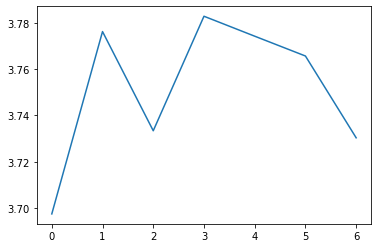

In [11]:
X = [weekAverage[x][0] for x in range(len(weekAverage))]
Y = [weekAverage[x][1] for x in range(len(weekAverage))]

plt.plot(X,Y)

### Gráfico de barras
Utilizamos la función _ylim(min,max)_ que especifica los límites en el eje.  
También utilizamos otros componentes de la gráfica para una mejor presentación

<BarContainer object of 7 artists>

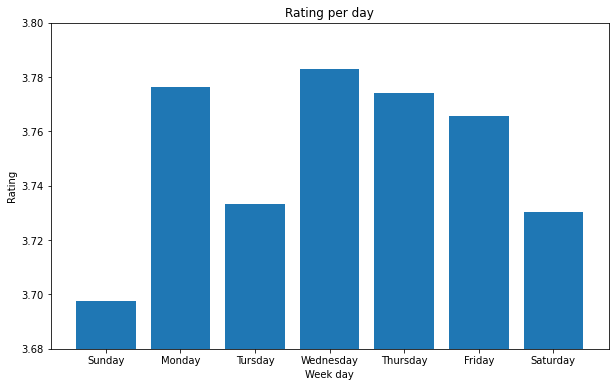

In [13]:
plt.figure(figsize=(10,6))
plt.ylim(3.68,3.8)

plt.xlabel("Week day")
plt.ylabel("Rating")

plt.xticks([0,1,2,3,4,5,6], ['Sunday', 'Monday', 'Tursday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

plt.title("Rating per day")
plt.bar(X,Y)

# Librerás urllib y BeautifulSoup

In [1]:
from urllib.request import urlopen

In [2]:
f = urlopen("https://www.goodreads.com/book/show/4671.The_Great_Gatsby")
html = str(f.read())
html

'b\'<!DOCTYPE html>\\n<html class="desktop withSiteHeaderTopFullImage\\n">\\n<head prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# good_reads: http://ogp.me/ns/fb/good_reads#">\\n  <title>The Great Gatsby by F. Scott Fitzgerald</title>\\n\\n<meta content="The Great Gatsby book. Read 67,539 reviews from the world\\\'s largest community for readers. Alternate Cover Edition ISBN: 0743273567 (ISBN13: 978074327356..." name=\\\'description\\\'>\\n<meta content=\\\'telephone=no\\\' name=\\\'format-detection\\\'>\\n<link href=\\\'https://www.goodreads.com/book/show/4671.The_Great_Gatsby\\\' rel=\\\'canonical\\\'>\\n    <meta content=\\\'2415071772\\\' property=\\\'fb:app_id\\\'>\\n<meta content=\\\'books.book\\\' property=\\\'og:type\\\'>\\n<meta content=\\\'The Great Gatsby\\\' property=\\\'og:title\\\'>\\n<meta content="Alternate Cover Edition ISBN: 0743273567 (ISBN13: 9780743273565)  The Great Gatsby, F. Scott Fitzgerald\\\'s third book, stands as the supre..." property=\\\'og:descri